<a href="https://colab.research.google.com/github/jwphantom/tree-growth-simulator/blob/main/TP_Proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
import math

1 - 

a) Ecriture du simulateur d'un similuteur de la loi bruit

b) Code du calcul de la densité

c) Code du des probabilités

d) Code du calcul des quantiles

In [124]:
#supposons le paramètre thêta = 1 
t = 240.05

In [125]:
#initialisation du seed à 13
seed = 13

In [126]:
# a) Simulateur de la loi du bruit
def invForest(x):
    r = []
    for i in x:
        if(i<0):
            return r.append(0)
        elif(i>0 and i<1):
            Result=(-1/t)*math.log(1-i)
            r.append(Result)
    return r

In [127]:
# b) fonction de densité
def dForest(x):
    p=t*x
    if(x<0):
        return 0
    return t*math.exp(-p)

In [128]:
# c) fonction de probabilité
def pForest(q):
    return frForest(q)

In [129]:
# d) fonction des quantiles
def qForest(p):
    return(invForest(p))

In [130]:
# Fonction de répartition.
def frForest(x):
    print(x)
    p=x*t
    if(x<0):
        return 0
    result= 1-math.exp(-p)
    return result

2- Test des fonctions , répresenation des histogrammes d'un jeu tiré de vos simulations


In [131]:
# a) Generateur des variables alatoire
def randomForest(n):
    
    u= np.random.uniform(size=n)
    return (invForest(u))

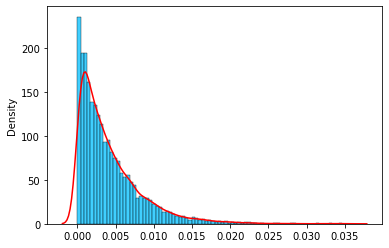

In [132]:
# b) Tracer de l'histogramme 

g = randomForest(10000)

sns.histplot(g, color='deepskyblue', stat='density')
sns.kdeplot(g, color='red')
plt.show()

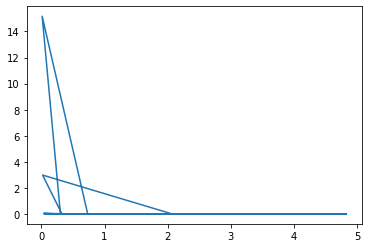

In [133]:
# c) Test de la fonction de densité


#Fonction qui injecte n valeur dans la fonction de densité
def injectValue(x):
    r = []
    for i in x:
        r.append(dForest(i))
    return r

#récuparation dans un tableau pour traçer la fonction du bruit.

def plotBruit(n):
  x = np.random.exponential(size=n)
  y = injectValue(x)

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotBruit(100)


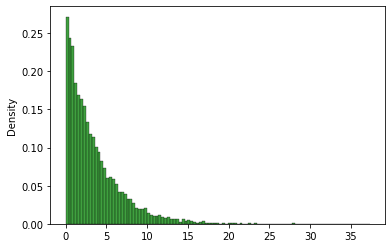

In [134]:
# c) Tracé de la loi exponentielle 

# Using exponential() method
s= np.random.seed(seed)


gfg = np.random.exponential(3.45, 10000)

sns.histplot(gfg, color='green', stat='density')
plt.show()

3- 

a) Ecrivons le code du modèle

In [135]:
t = 0.001
from scipy.stats import multivariate_normal


# Fonction du modèle
def model():
  D = 150
  r = 0.3
  s= np.random.seed(seed)

  # calcul de X0 et X1
  X0 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[0]
  X1 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[1]

  X = []
  X.append(X0)
  X.append(X1)

  #ep_k = np.random.lognormal(size=50, mean=0, sigma=.002)
  ep_k = randomForest(50)
  for i in range(2,50):    
    m = D**(1-np.exp(-r))*((X[i-1]+X[i-2])/2)**(np.exp(-r)) * ep_k[i-1]
    X.append(m)

  return X   



b)  Affichons les valeurs en cm de la taille de l'arbre

In [136]:
print(model()) 

[10.224326730071578, 12.287272573038988, 32902.726594515734, 4997701.709425502, 258794333.80992278, 135475683.536639, 1813365906.516788, 1007641290.2838677, 42758370474.187164, 78174517713.84396, 405185340543.9982, 293994934028.8692, 557416509160.7676, 14283310344.61109, 498879596743.834, 3090704514508.1743, 1077783430209.9054, 1884965947682.005, 9503681683347.965, 334448655452.3138, 622860464349.834, 1637084833876.5066, 6443244328642.623, 70025579631.94211, 9359765255798.62, 15030167169517.615, 1427794265338.4622, 14476923038433.2, 9403971236919.324, 11670200209960.09, 50673534692031.05, 437346495.5176704, 8841987584468.8, 10651979725975.3, 6027678135196.192, 4438474430430.994, 11519599018698.186, 33211914234032.535, 7967245652858.86, 16375953638358.828, 5281706569384.429, 7920299713464.143, 10676100107484.324, 21953931547252.734, 1582317920676.9392, 20462905651985.17, 13370276489278.531, 3431290990050.3633, 1430568275292.2993, 1547093901514.8875]


4) 



In [137]:
def nbannée(init) :
  x = []
  for i in range(50):
    x.append(init + i)

  return x

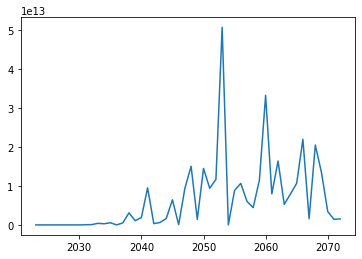

In [138]:
annee = 2023

def plotModel():
  x = nbannée(annee)
  y = model()

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotModel()


 **a) Année à laquelle l'arbre atteindra sa plus grande taille  : [texte du lien](https://)**

In [139]:
from operator import indexOf

y = model().index(max(model())) 
print (str(nbannée(annee)[y]))

2053



**b) Valeurs de cette arbre en cm**

In [140]:
print (str(max(model())) + ' cm')

50673534692031.05 cm


**c) Plus grande variation entre deux annéees :**

In [141]:
def diffrence():
  x1 = max(model())
  x2 = model()[model().index(max(model())) -1 ]

  return x1-x2

print (str(diffrence()) + ' cm')

39003334482070.95 cm


**d) Année d'observation de ces marges :**  2050 à 2053

**5) Similation de 50 réalisations sur 50 années**


pour faire 50 réalisations sur 50 années nous devons rétirer notre seed afin de pouvoir obtenir des valeurs différentes

In [155]:
# Fonction du modèle
def nModel():
  D = 150
  r = 0.3
  # calcul de X0 et X1
  X0 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[0]
  X1 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[1]

  X = []
  X.append(X0)
  X.append(X1)

  #ep_k = np.random.lognormal(size=50, mean=0, sigma=.002)
  ep_k = randomForest(50)
  for i in range(2,50):    
    m = D**(1-np.exp(-r))*((X[i-1]+X[i-2])/2)**(np.exp(-r)) * ep_k[i-1]
    X.append(m)

  return X   

In [156]:
def realisation(n):

  matrice = np.zeros(shape=(n, n), dtype=float)

  for i in range(n):
                                     
      matrice[i,] = nModel()

  return matrice

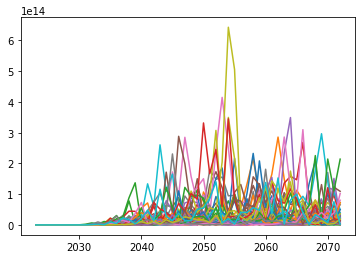

In [157]:
annee = 2023

def plotModel():
  y = realisation(50)
  
  x = nbannée(2023)
  
  for a in range(50):
      plt.plot(x, y[a,])

  plt.show()

plotModel()